# Global Power Plant Datasets

For this project, I will be working on the global power plant datasets pulled from Kaggle. World Resources Institute (WRI) experts and their partners created the Global Power Plant Database from official government data and independent sources around the world and delivered the final database as an open data resource. The database collects the following characteristics and indicators:
▪ All types of fuel 
▪ Technical characteristics (fuel, technology, ownership)
▪ Operational characteristics (generation)
▪ Plants’ geolocation
▪ Plants over 1 megawatt (MW) 
▪ Plants in operation only (in first iteration)

**Step 1: We will import the required modules and packages to run our codes**

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple
import plotly.express as px
import plotly.graph_objects as go

# set the plots to display in the Jupyter notebook
%matplotlib inline

# change plotting colors per client request
plt.style.use('ggplot')

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

**Step 2: We will read the dataset pulled from kaggle**

In [3]:
# first requirement : pulling data from a dataset
gpp = pd.read_csv("global_power_plant_database.csv")
#gpp.head()

C:\Users\linges14\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Step 3: Cleaning the datasets**

In [5]:
# gpp.dtypes  ## checking the data type for each column
#gpp.isnull().sum() ##checking the column with null values

## due to the insignificance we will be dropping few columns

Dropping the columns we won't be using

In [6]:
to_drop = ['other_fuel1', 'other_fuel2', 'other_fuel3', 'commissioning_year','owner', 'source', 'url', 
           'geolocation_source', 'wepp_id','generation_gwh_2013', 'generation_gwh_2014','generation_gwh_2015',
           'generation_gwh_2016','generation_gwh_2017', 'generation_gwh_2018', 'estimated_generation_gwh_2013',
          'estimated_generation_gwh_2014', 'estimated_generation_gwh_2015','estimated_generation_gwh_2016',
          'estimated_generation_note_2013', 'estimated_generation_note_2014', 'estimated_generation_note_2015',
          'estimated_generation_note_2016', 'estimated_generation_note_2017', 'generation_data_source']

gpp.drop(to_drop, inplace=True, axis=1) ## in axis we set it to 1, cuz we wanna drop columns

## since I used inplace true, running it again will throw me an error as the columns are already dropped
## we dropped those columns because more than half of the data were null values, hence it won't contributing much for data analysis

In [186]:
 gpp.head(15)
# gpp.isnull().sum()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,year_of_capacity_data,generation_gwh_2019,estimated_generation_gwh_2017,continent,capacity,capacity_gw
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.3220,65.1190,Hydro,2017,11.53,119.500000,South America,0.03300,0.03300
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.00,31.6700,65.7950,Solar,2017,11.53,18.290000,South America,0.01000,0.01000
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.00,31.6230,65.7920,Solar,2017,11.53,18.720000,South America,0.01000,0.01000
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.5560,69.4787,Hydro,2017,11.53,174.910000,South America,0.06600,0.06600
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.6410,69.7170,Hydro,2017,11.53,350.800000,South America,0.10000,0.10000
5,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.4847,70.3633,Hydro,2017,11.53,46.120000,South America,0.01155,0.01155
6,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,34.5638,69.1134,Gas,2017,11.53,716.443378,South America,0.04200,0.04200
7,AFG,Afghanistan,Pul-e-Khumri Hydroelectric Power Plant Afghani...,GEODB0040537,6.00,35.9416,68.7100,Hydro,2017,11.53,19.740000,South America,0.00600,0.00600
8,AFG,Afghanistan,Sarobi Dam Hydroelectric Power Plant Afghanistan,GEODB0040535,22.00,34.5865,69.7757,Hydro,2017,11.53,80.000000,South America,0.02200,0.02200
9,ALB,Albania,Bistrica 1,WRI1002169,27.00,39.9116,20.1047,Hydro,2017,11.53,88.450000,South America,0.02700,0.02700


In [12]:
gpp['year_of_capacity_data'].fillna(value='2017',inplace= True)
#gpp.head(10) 
###'''I filled in the NaN values with 2017, because, according to the research conducted on the datasets most of the 
### plants were built in 2017. Year of capacity means the year it started operating to the fullest'''
# gpp.head(100)

In [33]:
gpp.fillna(value={'generation_gwh_2019': gpp['generation_gwh_2019'].median()}, inplace= True)
# gpp.head(10)
## I filled in the null values in the generation_gwh_2019 column with median of that particular column
## I chose median, cuz the median values seems more reasonable than the mean values

In [18]:
# gpp.fillna(value={'estimated_generation_gwh_2017': gpp['estimated_generation_gwh_2017'].mean()}, inplace = True)
# gpp.head(10)

In [243]:
# gpp.isnull().sum()

In [25]:
## I'm, creating a dictionary with the country column as my key and country_long column as my value. 
list_of_countries = dict(zip(gpp.country,gpp.country_long))
#list_of_countries

**Graph of country vs number of power plants**

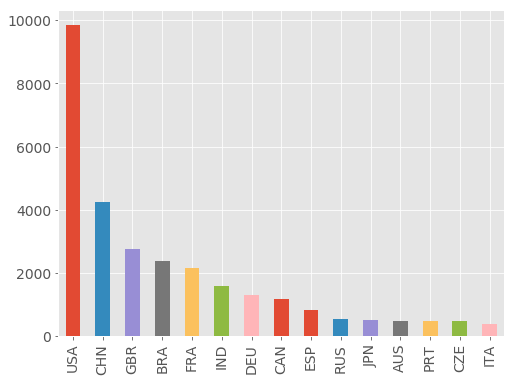

In [43]:
## The graph shows the first 15 country with highest count of power plants
## since I have 167 countries in my dataset, plotting all 167 countries would not be advisable
country_bar = gpp['country'].value_counts().head(15).plot(kind='bar')

**Graph to compare the capacity of the power plant and generation of the power plant**

In [146]:
## I created a new column for capacity in gw
gpp['capacity_gw'] = gpp['capacity_mw']/1000 
gpp.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,year_of_capacity_data,generation_gwh_2019,estimated_generation_gwh_2017,continent,capacity,capacity_gw
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,2017,11.53,119.50,South America,0.033,0.033
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,2017,11.53,18.29,South America,0.010,0.010
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,2017,11.53,18.72,South America,0.010,0.010
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,2017,11.53,174.91,South America,0.066,0.066
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,2017,11.53,350.80,South America,0.100,0.100


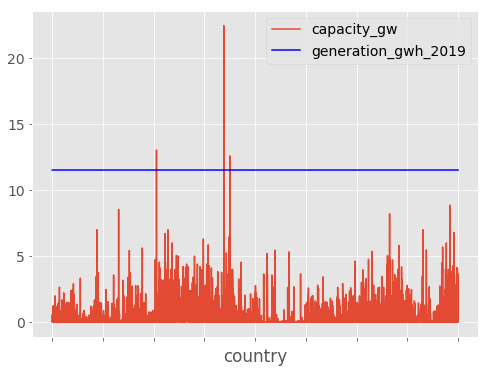

In [202]:
## This graph compares the capacity of the power plant with the generation of the power plant
ax = plt.gca() #gca stands for get current axis

gpp.head(20000).plot(kind='line',x='country',y='capacity_gw',ax=ax)
gpp.head(20000).plot(kind='line',x='country',y='generation_gwh_2019', color='blue', ax=ax)

plt.show()

In [245]:
#gpp.sort_values('country_long')

**I created a class that performs 2 methods**

In [246]:
class Energy():
    
    def __init__(self):
        print("Hi. You're now accessing the Global Power Plant database")

    def major_source(self):
        ## prints a sunburst chart that compares all the countries and their fuel source
        gpp_chart = gpp.groupby(by=["country_long", "primary_fuel"]).count()[["country"]].rename(columns={"country":"Num of PP"})
        gpp_chart["World"] = "World"
        gpp_chart = gpp_chart.reset_index()
        #gpp_chart.head()
        
        fig = px.sunburst(gpp_chart,
                  path=[ "World","country_long", "primary_fuel"],
                  values='Num of PP',
                  title="World major source",
                  width=750, height=750)
                
        fig.show()
        
    def pp_loc(self, name):
        ## When user inputs the name as an argument, the function gives out the location of the plant
        self.name = name
        if name in gpp.name.unique():
            for i in range(len(gpp.name.unique())):
                lat = gpp.iloc[i]['latitude']
                long = gpp.iloc[i]['longitude']
                return ("My location of this power plant is {}, {}".format(lat, long))
    
            


print("It runs")

It runs


In [241]:
q=Energy()

Hi. You're now accessing the Global Power Plant database


In [242]:
q.major_source()

In [236]:
q.pp_loc('Kajaki Hydroelectric Power Plant Afghanistan')

'My location of this power plant is 32.322, 65.119'